# Note:

I did not spend much time on this. My main focus was on the used car prices project, but this one does still work

# Early thoughts


---


So this dataset is actually quite nice in that there are no missing values, and the "v-values" are already in a nice form for the model. So what's left is to get the two non-transformed variables (time, and amount) to be standardized, and then essentially get modeling.

FRAUDULANT CASES MAKE UP 0.172% OF THE DATA

This dataset has a big issue in that the overwelming majority of the data is non-fraudulant cases. That could result in the model just guessing 1 value regardless of any data, and score a high accuracy. I plan on using this article for inspiration on how to work around that:
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

*    Immediately, the idea that looks the best is to undersample (2.1 in the article) so that fraud-nonfraud are more evenly distributed. It's possible to combine that with bagging to ensemble a bunch of those models, which is currently looking like the best idea for this




# Setting up dataframe/imports

In [2]:
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./creditcard.csv')

#The Data Cleaning

Things to do:     


*   Standardize time and amount (how to?)
*   Drop outliars






In [3]:
# Caught a lot of duplicates. 1k is pretty insignificant relative to the 283k data points so its fine to have them deleted
data_clean = klib.data_cleaning(data)

Shape of cleaned data: (283726, 31) - Remaining NAs: 0


Dropped rows: 1081
     of which 1081 duplicates. (Rows (first 150 shown): [33, 35, 113, 114, 115, 221, 223, 1178, 1180, 1382, 1384, 1684, 1686, 2004, 2005, 2006, 2728, 2729, 2731, 2732, 2734, 2735, 2784, 2786, 2998, 3000, 3175, 3177, 3316, 3318, 3321, 3323, 4900, 4902, 5925, 5927, 6411, 6412, 6413, 9027, 9028, 9029, 11132, 11134, 12393, 12394, 12395, 13563, 13564, 13565, 13882, 13883, 13884, 16391, 16393, 17949, 17950, 17951, 18051, 18052, 18053, 18263, 18265, 19617, 19619, 19636, 19638, 19797, 19799, 20418, 20420, 21252, 21254, 21403, 21405, 21676, 21677, 21678, 21683, 21684, 21685, 21966, 21967, 21968, 22476, 22478, 22789, 22791, 23891, 23892, 23893, 24965, 24967, 24992, 24994, 25460, 25461, 25462, 25692, 25694, 26943, 26944, 26946, 26947, 26949, 26950, 27402, 27404, 27776, 27777, 27778, 28543, 28544, 28546, 28547, 28549, 28550, 28644, 28646, 29595, 29597, 30136, 30138, 30671, 30673, 30680, 30682, 31637, 31639, 31848, 31850, 3

In [4]:
df = data_clean.copy()

### Misc. data features:    

*   V-values tend to have means around 0, and SD around 1. Even so, they still show extreme min and maxes. Needs to be addressed* (TEST FOR CORRELATION FIRST?)


In [5]:
# No missing values**

klib.missingval_plot(data_clean)

No missing values found in the dataset.


In [6]:
data_clean.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data_clean.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.085938,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.046875,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407509,-72.715729,-48.325588,-5.683171,-113.743309,-26.160505,-43.557243,-73.216721,-13.434067,...,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057730,9.382559,16.875343,34.801666,73.301628,120.589493,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519588,3.517346,31.612198,33.847809,25691.160000,1.000000


### Getting rid of outliers

So, I made a block of code here that removes "outliers" according to the IQR coefficient. Even on making my interval (first - 3*IQR, third + 3*IQR), instead of a standard, 0.87% of removed rows are fraudulant. This is significantly higher than the 0.172% of fraudulant cases this dataset has, and just about kills the available fraudulant cases to test.
So clearly, what we know now is that the fraudulant cases are basically all  "outliers"

In [8]:
#@title Default title text
# Goal here is to try and remove outliers
totalB = len(data_clean)
nonFraudBefore, fraudBefore = data_clean['class'].value_counts()[0], data_clean['class'].value_counts()[1] # Just to get information on what the outliars were

columnsArr = pd.Series(data_clean.columns).drop([0, 29, 30]) # dropping class, time, and amount
origLen = len(data_clean)

# for loop iterates over each column, finding quartiles so IQR can be calculated. Then determines upper and lower bounds, and deletes rows that have values falling outside that range
for column in columnsArr:
  firstQ, thirdQ = data_clean[column].quantile([.25, .75])       # finds quartiles so I can calculate IQR and from there cutoff points to
  iqr = (thirdQ - firstQ) * 1.5                                  # Subject to change if it cuts off too much data
  lowerCutoff, upperCutoff = firstQ - iqr, thirdQ + iqr

  # creates (and drops) a new dataframe that has data exceeding the upper and lower bounds
  data_clean = data_clean.drop(data_clean[(data_clean[column] > upperCutoff) | (data_clean[column] < lowerCutoff)].index)

removedNum = origLen - len(data_clean)
print(removedNum, 'rows have been removed.')
nonFraudAfter, fraudAfter = data_clean['class'].value_counts()[0], data_clean['class'].value_counts()[1] # Again, gathering data on what outliars were

print('Of those removed,', round((nonFraudBefore-nonFraudAfter)*100/removedNum, 2), '% were non-fraudulant, and', round((fraudBefore-fraudAfter)*100/removedNum,2), '% were fraudulant')

163494 rows have been removed.
Of those removed, 99.72 % were non-fraudulant, and 0.28 % were fraudulant


In [9]:
# See above for before
data_clean.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,...,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000,120232.000000
mean,95161.437500,0.854482,0.001996,0.061242,0.117018,-0.175994,-0.396404,0.013956,0.006798,0.024699,...,-0.035108,-0.061945,0.007844,0.015786,0.060847,-0.018137,0.008791,0.005041,44.938378,0.000108
std,46644.332031,1.095810,0.726785,1.169186,0.995808,0.736134,0.609511,0.642365,0.276725,0.820419,...,0.237867,0.658950,0.187702,0.501301,0.402609,0.414873,0.091736,0.060426,64.018792,0.010398
min,0.000000,-3.087106,-2.623523,-3.469030,-3.178091,-2.514681,-2.316707,-2.062559,-0.861235,-2.351125,...,-0.795850,-2.190768,-0.527654,-1.407372,-1.251743,-1.105538,-0.247596,-0.165467,0.000000,0.000000
25%,54862.000000,-0.229282,-0.463773,-0.750652,-0.618938,-0.658145,-0.821528,-0.452417,-0.185516,-0.465338,...,-0.228878,-0.609808,-0.116998,-0.312215,-0.261584,-0.315059,-0.049483,-0.040435,3.990000,0.000000
50%,80781.500000,1.175429,0.002486,0.213051,0.220891,-0.163986,-0.457737,0.053499,-0.019846,0.006092,...,-0.046181,-0.071324,-0.000319,0.040628,0.089783,-0.031369,-0.004299,0.009604,17.990000,0.000000
75%,140163.250000,1.890928,0.487565,0.916914,0.732736,0.326120,-0.016124,0.452241,0.169998,0.534399,...,0.145056,0.439838,0.128738,0.394209,0.371164,0.203034,0.048178,0.036240,59.000000,0.000000
max,172792.000000,2.379970,2.775110,3.790995,3.054998,2.433526,1.809233,2.173884,0.878877,2.364144,...,0.730670,2.049508,0.510510,1.299212,1.287646,1.006621,0.263022,0.164553,579.000000,1.000000


In [10]:
# As shown above, outliers are fraudulant. In that process I removed the outliers, but here I'm bringing them back
data_clean = df

### Standardization/Normalization

Even though "v-values" are basically ready to go, time and amount still need to be made into a nicer form.

What I'm doing here is standardizing these two values. After this transformation, all the data should be ready to throw into some models



In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

amount = data_clean['amount']
data_clean['amount'] = scaler.fit_transform(amount.values.reshape(-1,1))

time = data_clean['time']
data_clean['time'] = scaler.fit_transform(time.values.reshape(-1,1))

data_clean.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,2.837260e+05,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05,283726.000000
mean,1.376768e-08,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,-5.409347e-17,0.001667
std,1.000002e+00,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.000002e+00,0.040796
min,-1.996823e+00,-56.407509,-72.715729,-48.325588,-5.683171,-113.743309,-26.160505,-43.557243,-73.216721,-13.434067,...,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430084,-3.533268e-01,0.000000
25%,-8.552128e-01,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-3.309625e-01,0.000000
50%,-2.131081e-01,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,-2.654671e-01,0.000000
75%,9.369423e-01,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,-4.378088e-02,0.000000
max,1.642362e+00,2.454930,22.057730,9.382559,16.875343,34.801666,73.301628,120.589493,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519588,3.517346,31.612198,33.847809,1.022476e+02,1.000000


# Getting a feel for it

What influences what in this dataset?


*   Correlations?
The data doesn't have any giveaway correlations, but there is much higher negative correlation than there is positive correlation. v17, v14, v12, and v10 all show significant correlations. Something worth noting, is that none of those listed values show any remarkable correlation with themselves. i.e. v17 does not correlate significantly with v10, v12, and v14 and nor does v10 with v12, v14, or v17, etc...
*   The plots reveal that generally the v-values tend to negatively correlate with close v-values. As in, v8 seemingly has more correlation with those within the 2-3 cloest (interval of v5-v11) than tends to have with say for example v18. Looking at the plot as a triangle, it's easy to see this since the more heavily correlated variables tend to be around the hypotenuse.




Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

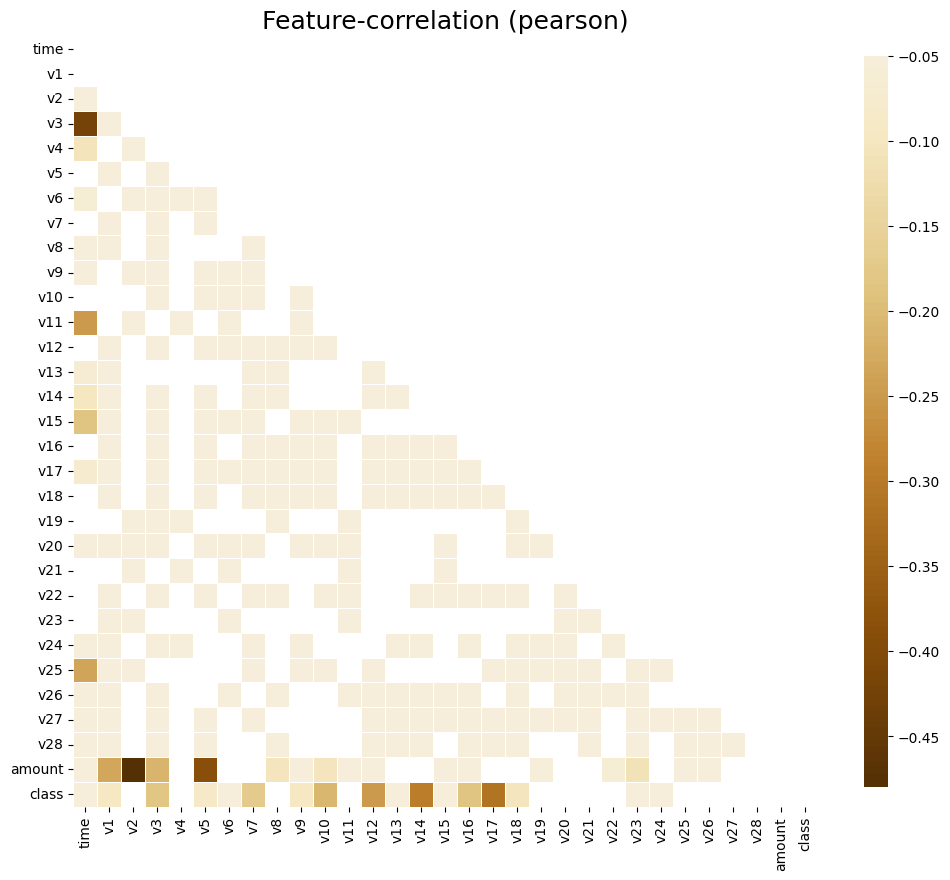

In [12]:
klib.corr_plot(data_clean, split='neg', annot=False)

# Modeling

One of the things I found browsing online, and went over in class was handling heavily uneven datasets. Clearly, this dataset is extremely unbalanced with 0.172% of the credit card transactions being fraudulant, and the rest being non-fraudulant. To rectify this issue, what I've done is in my testing data pull a random sample of non-fraudulant cases from the bunch. Thus in the training data we will now find an equal number of fraudulant cases as well as non-fraudulant cases. This method should increase legitimate accuracy. Without such a method, "accuracy" will be unreasonably high because guessing everything as non-fraudulant would return a 99.82%+ accuracy.

In [13]:
print(len(data_clean[data_clean['class'] == 1]))

473


In [14]:
# The fraudulant cases
dfFraud = data_clean[data_clean['class'] == 1].sample(473)

# Getting an equivelantly sized sample from the nonFraud cases
dfNotFraud = data_clean[data_clean['class'] == 0].sample(473)

# Merging them for test data
df = pd.merge(dfFraud, dfNotFraud, how='outer')

In [15]:
df.describe().loc['mean','class'] # Fraud/Non fraud = 50%

0.5

Now we split the data into train/test, small test size due to limited data

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
  RandomForestClassifier(), 
  BaggingClassifier(),
  LogisticRegression(),
  DecisionTreeClassifier(),
  GradientBoostingClassifier()
]

for thing in models:
  reg = thing
  reg.fit(X_train, y_train)

  print(thing, ' has Accuracy: ', reg.score(X_test,y_test))


RandomForestClassifier()  has Accuracy:  0.9263157894736842
BaggingClassifier()  has Accuracy:  0.9263157894736842
LogisticRegression()  has Accuracy:  0.9368421052631579
DecisionTreeClassifier()  has Accuracy:  0.8947368421052632
GradientBoostingClassifier()  has Accuracy:  0.9368421052631579


# Conclusion:

---


Logistic Regression was clearly the best model here at 96.842% Accuracy. The initial problem clearly was to figure out what was and was not fraud based on a whole host of variables. Along the way I made some observations such as the majority of outlier cases are fraudulant. We saw some interesting correlations between some of the "V-values" but without knowing their context its difficult to say how "interesting" they truly are. In the end though, the model came out to be accurate. The method used to retreive the train/test data worked very nicely. Without taking a similar amount of fraudulant and nonfraudulant cases to train, the model vastly overstated its accuracy since it guessed nonfraudulant every time. On a dataset like such, this returns 99%+ accuracy, but we avoided that pitfall.

In terms of what I would change if I did it all again, I would spend some more time on the models and trying to tune them a bit more. Although logistic regression seems like the best option, DecisionTreeClassifier for instance was not far behind. Its possible as a result of the default parameters given for each model, that some performed better than others due to the nature of their model.